# Data understanding

De gebruikte dataset is “Geregistreerde criminaliteit" (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83648NED/table?fromstatweb). 

De CBS data is een csv bestand, dit staat voor comma seperated values of door comma gescheide waarden in het nederlands.
De data bevat de volgende kolomen:
 - `ID` is de unieke waarde voor elke row.
 - `Soort misdrijf` geeft aan welke om wat voor misdrijf het gaat.
 - `Perioden` geeft de periode aan waarin de misdrijven en aantal misdrijven zijn uitgevoerd.
 - `Regio's` is de regio waarin de genoemde aantal misdrijven in zijn gebeurd.
 - `Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)` is de procentuele aantal van de totaal geregistreerde misdrijven.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1.000 inwoners)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn per 1.000 inwoners.

## Beschrijven van de data

Hieronder staat een beschrijving van de data vanuit de Centraal Bureau Statistieken. Dit wordt telkens door middel van een stukje code weergegeven. Bij deze data understanding zullen we vooral kijken met wat voor data we te maken hebben. De code die wordt uitgevoerd is inclusief comments die uitlegt wat de code doet.

In [1]:
# Handige jupyter notebook magic
%config IPCompleter.greedy = True  
%matplotlib inline

import pandas as pd
import geopandas as gpd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from prep import movecol

# Dataset inlezen
file = "../../../raw-data/Veiligheid.csv"
data_veiligheid = pd.read_csv(file, sep=";")

df = pd.DataFrame(data_veiligheid)

# Dataverkennen door dataframe te openen
data_veiligheid

,Soort misdrijf,Perioden,Regio's,Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal),"Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)",Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1 000 inwoners)
0,"Misdrijven, totaal",2012,Aa en Hunze,940.0,100.0,"36,6"
1,"Misdrijven, totaal",2013,Aa en Hunze,785.0,100.0,"30,8"
2,"Misdrijven, totaal",2014,Aa en Hunze,680.0,100.0,"26,9"
3,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0,"25,6"
4,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0,"24,6"
...,...,...,...,...,...,...
24781,9 Misdrijven overige wetten,2013,Niet-gemeentelijk ingedeeld,20.0,1.0,NaN
24782,9 Misdrijven overige wetten,2014,Niet-gemeentelijk ingedeeld,15.0,1.0,NaN
24783,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN
24784,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,20.0,2.0,NaN


In [2]:
# Info over de kolommen
data_veiligheid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24786 entries, 0 to 24785
Data columns (total 6 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   Soort misdrijf                                                                                          24786 non-null  object 
 1   Perioden                                                                                                24786 non-null  int64  
 2   Regio's                                                                                                 24786 non-null  object 
 3   Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                     21627 non-null  float64
 4   Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerd


De output hierboven geeft informatie weer over de data_veiligheid dataset. De volgende kunnen we hieruit halen:
- 24786 entries
- 6 kolommen
- dtypes: float64(2), int64(1), object(3)

In [3]:
# Informatie over de kolomnamen in de Dataframe
data_veiligheid.columns

Index(['Soort misdrijf', 'Perioden', 'Regio's',
       'Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)'],
      dtype='object')

In [4]:
# Controleren op nulwaarden in de dataframe
data_veiligheid.isna().sum()

Soort misdrijf                                                                                                0
Perioden                                                                                                      0
Regio's                                                                                                       0
Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                        3159
Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)     3159
Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)                   13212
dtype: int64

## Samenvatting data understanding
In deze data understanding hebben we 1 dataframe gemaakt waarin de data is ingeladen.
- `Data_veiligheid`

Verder weten we hoe groot de dataset is, hoeveel nul waarden de dataset bevat en de kolommen die in de dataset staan.

# Data exploratie
Bij de data exploratie exploreren we naar de data in de kolommen staan. In deze dataset is er maar 1 kolom die een beschrijving geeft over de numerieke waardes die in de andere kolommen staan. Dit is de `Soort misdrijf` kolom. In deze hoofdstuk willen we alleen zien welke waardes er minimaal 1 keer in voorkomen.

In [5]:
# Alle soorten misdrijven die er minimaal 1 keer in voorkomen.
soorten_misdrijven = data_veiligheid["Soort misdrijf"].drop_duplicates()
soorten_misdrijven

0                            Misdrijven, totaal
2754                      1 Vermogensmisdrijven
5508     2 Vernielingen, misdr.openb.orde/gezag
8262          3 Gewelds- en seksuele misdrijven
11016                4 Misdrijven WvSr (overig)
13770                      5 Verkeersmisdrijven
16524                         6 Drugsmisdrijven
19278                   7 (Vuur)wapenmisdrijven
22032               9 Misdrijven overige wetten
Name: Soort misdrijf, dtype: object

# Data Preperation
In deze onderdeel zal de data geprepareerd worden. Een aantal dingen moeten gedaan worden.
- De kolomnamen moeten makkelijk en overzichtelijk gemaakt worden.
- Provincies moeten aan de dataset toegevoegd worden o.b.v. regio's.
- De nul waardes moeten uit de hele dataset gehaald worden.
- De data moet genormaliseerd worden o.b.v. de aantal misdrijven. Deze genormaliseerde waarde moet in een nieuwe kolom.
- De genormaliseerde data moet geclassificeerd worden en in een nieuwe kolom gezet worden.
- De definitieve data moet in een nieuwe dataframe gezet worden.

In deze data preperation worden deze onderdelen allemaal hieronder uitgevoerd. Aan het eind van de data preperation is er nog een samenvatting.

In [36]:
# Kolomnamen van de dataset wijzigen.
data_veiligheid_nieuw = data_veiligheid
data_veiligheid_nieuw.rename(columns={'Soort misdrijf':'Soort_misdrijf','Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)':'Aantal_misdrijven', 'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)':'Misdrijven_relatief(%)', 'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)':'Aantal_misdrijven(per_1000_inw)'}, inplace=True)

# Kolommen droppen die niet van belang zijn.
data_veiligheid_nieuw = data_veiligheid_nieuw.drop(columns=["Aantal_misdrijven(per_1000_inw)"])
data_veiligheid_nieuw

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%)
0,"Misdrijven, totaal",2012,Aa en Hunze,940.0,100.0
1,"Misdrijven, totaal",2013,Aa en Hunze,785.0,100.0
2,"Misdrijven, totaal",2014,Aa en Hunze,680.0,100.0
3,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0
4,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0
...,...,...,...,...,...
24781,9 Misdrijven overige wetten,2013,Niet-gemeentelijk ingedeeld,20.0,1.0
24782,9 Misdrijven overige wetten,2014,Niet-gemeentelijk ingedeeld,15.0,1.0
24783,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,25.0,1.0
24784,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,20.0,2.0


De kolomnamen van de dataset zijn gewijzigd naar makkelijkere en overzichtelijkere namen. Verder zijn de kolommen die niet nodig zijn gedropped.

Deze nieuwe gegevens zijn opgeslagen in de dataframe `data_veiligheid_nieuw`.

In [39]:
# Nieuwe dataset inladen voor mergen dataset, zodat regio's ook provincie er achter hebben staan.
file = "../../../raw-data/gemeenten-provincie.xlsx"
postcode = pd.read_excel(file) 

# Dataframe maken van de dataset
df2 = pd.DataFrame(postcode)

# Kolom hernoemen
postcode.rename(columns={"Gemeente":"Regio's"}, inplace=True)

# Dataframe opnieuw defineren
df2 = pd.DataFrame(postcode)

# Mergen van 2 dataset op basis van regio's colomn
data_veiligheid_incl_provincie = data_veiligheid_nieuw.merge(df2, on="Regio's")

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Provincie
0,"Misdrijven, totaal",2012,Aa en Hunze,940.0,100.0,Drenthe
1,"Misdrijven, totaal",2013,Aa en Hunze,785.0,100.0,Drenthe
2,"Misdrijven, totaal",2014,Aa en Hunze,680.0,100.0,Drenthe
3,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0,Drenthe
4,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0,Drenthe
...,...,...,...,...,...,...
24781,9 Misdrijven overige wetten,2013,Niet-gemeentelijk ingedeeld,20.0,1.0,Overig
24782,9 Misdrijven overige wetten,2014,Niet-gemeentelijk ingedeeld,15.0,1.0,Overig
24783,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,25.0,1.0,Overig
24784,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,20.0,2.0,Overig


In [62]:
data_veiligheid_incl_provincie = movecol(data_veiligheid_incl_provincie, cols_to_move=['Provincie'], ref_col="Regio's", place='After')

data_veiligheid_incl_provincie.loc[((data_veiligheid_incl_provincie["Regio's"] == "Zwolle"))]

,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd,Aantal_misdrijven_klasse
24678,"Misdrijven, totaal",2012,Zwolle,Overijssel,9400.0,100.0,0.092474,Hoog
24679,"Misdrijven, totaal",2013,Zwolle,Overijssel,8930.0,100.0,0.087850,Hoog
24680,"Misdrijven, totaal",2014,Zwolle,Overijssel,7850.0,100.0,0.077226,Hoog
24681,"Misdrijven, totaal",2015,Zwolle,Overijssel,7485.0,100.0,0.073635,Hoog
24682,"Misdrijven, totaal",2016,Zwolle,Overijssel,6665.0,100.0,0.065568,Hoog
...,...,...,...,...,...,...,...,...
24727,9 Misdrijven overige wetten,2013,Zwolle,Overijssel,30.0,0.0,0.000295,Midden
24728,9 Misdrijven overige wetten,2014,Zwolle,Overijssel,15.0,0.0,0.000148,Midden
24729,9 Misdrijven overige wetten,2015,Zwolle,Overijssel,15.0,0.0,0.000148,Midden
24730,9 Misdrijven overige wetten,2016,Zwolle,Overijssel,25.0,0.0,0.000246,Midden


Hierboven worden de provincies aan deze dataset toegevoegd d.m.v. een 2e dataset. Zoals hierboven te zien, is de nieuwe data `Provincie` toegevoegd.

De toegevoegde `Provincie` wordt verplaatst zodat die naast de regio's kolom staan. Op deze manier is er meer overzicht bij welke provincie een bepaalde regio hoord.

Deze nieuwe gegevens zijn opgeslagen in de dataframe `data_veiligheid_incl_provincie`.

In [42]:
# Nul waardes in de dataframe wegwerken.
data_veiligheid_incl_provincie = data_veiligheid_incl_provincie.fillna(value=0)

In [44]:
# Dataframe controleren op nul waardes. 
data_veiligheid_incl_provincie.isna().sum()

Soort_misdrijf            0
Perioden                  0
Regio's                   0
Provincie                 0
Aantal_misdrijven         0
Misdrijven_relatief(%)    0
dtype: int64

Hierboven worden de nulwaardes in de `data_veiligheid_incl_provincie` weggewerkt. Zoals hierboven te zien is, zijn er geen nul waardes meer in de dataframe.

In [45]:
# Data normaliseren o.b.v. de "Aantal_misdrijven".
np.set_printoptions(threshold=np.inf)

min_max_scaler = preprocessing.MinMaxScaler()

aantal_misdrijven_minmax = min_max_scaler.fit_transform(data_veiligheid_incl_provincie[["Aantal_misdrijven"]])
data_veiligheid_incl_provincie["Aantal_misdrijven_genormaliseerd"] = aantal_misdrijven_minmax

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd
0,"Misdrijven, totaal",2012,Aa en Hunze,Drenthe,940.0,100.0,0.009247
1,"Misdrijven, totaal",2013,Aa en Hunze,Drenthe,785.0,100.0,0.007723
2,"Misdrijven, totaal",2014,Aa en Hunze,Drenthe,680.0,100.0,0.006690
3,"Misdrijven, totaal",2015,Aa en Hunze,Drenthe,645.0,100.0,0.006345
4,"Misdrijven, totaal",2016,Aa en Hunze,Drenthe,620.0,100.0,0.006099
...,...,...,...,...,...,...,...
24781,9 Misdrijven overige wetten,2013,Niet-gemeentelijk ingedeeld,Overig,20.0,1.0,0.000197
24782,9 Misdrijven overige wetten,2014,Niet-gemeentelijk ingedeeld,Overig,15.0,1.0,0.000148
24783,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,Overig,25.0,1.0,0.000246
24784,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,Overig,20.0,2.0,0.000197


Hierboven is te zien dat er een nieuwe kolom genaamd `Aantal_misdrijven_genormaliseerd` is bijgekomen. Deze kolom gaan we gebruiken om de aantal misdrijven te kunnen classificeren.

In [46]:
# Beschrijven van de data.
data_veiligheid_incl_provincie.describe()

,Perioden,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd
count,24786.00000,24786.000000,24786.000000,24786.000000
mean,2014.50000,486.415920,19.358872,0.004785
std,1.70786,2698.254328,31.228256,0.026545
min,2012.00000,0.000000,0.000000,0.000000
25%,2013.00000,5.000000,0.000000,0.000049
50%,2014.50000,40.000000,2.000000,0.000394
75%,2016.00000,253.750000,16.000000,0.002496
max,2017.00000,101650.000000,100.000000,1.000000


In [52]:
# De lage en hoge waardes definieren o.b.v. quartielen.
m1 = data_veiligheid_incl_provincie['Aantal_misdrijven_genormaliseerd'] < 0.000099
m2 = data_veiligheid_incl_provincie['Aantal_misdrijven_genormaliseerd'] > 0.003245

# Toekennen van "Aantal_misdrijven_genormaliseerd" aan een klasse.
data_veiligheid_incl_provincie['Aantal_misdrijven_klasse'] = np.select([m1,m2], ['Laag','Hoog'], default='Midden')

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd,Aantal_misdrijven_klasse
0,"Misdrijven, totaal",2012,Aa en Hunze,Drenthe,940.0,100.0,0.009247,Hoog
1,"Misdrijven, totaal",2013,Aa en Hunze,Drenthe,785.0,100.0,0.007723,Hoog
2,"Misdrijven, totaal",2014,Aa en Hunze,Drenthe,680.0,100.0,0.006690,Hoog
3,"Misdrijven, totaal",2015,Aa en Hunze,Drenthe,645.0,100.0,0.006345,Hoog
4,"Misdrijven, totaal",2016,Aa en Hunze,Drenthe,620.0,100.0,0.006099,Hoog
...,...,...,...,...,...,...,...,...
24781,9 Misdrijven overige wetten,2013,Niet-gemeentelijk ingedeeld,Overig,20.0,1.0,0.000197,Midden
24782,9 Misdrijven overige wetten,2014,Niet-gemeentelijk ingedeeld,Overig,15.0,1.0,0.000148,Midden
24783,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,Overig,25.0,1.0,0.000246,Midden
24784,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,Overig,20.0,2.0,0.000197,Midden


Op basis van de quartielen van de kolom `Aantal_misdrijven_genormaliseerd` hebben we 3 klasses kunnen opmaken.
- Laag
- Midden
- Hoog

Alle regio's worden nu aan 1 van deze 3 klassen toegekend o.b.v. de aantal misdrijven die in de regio gepleegd zijn.

In [51]:
misdrijven_df = data_veiligheid_incl_provincie
misdrijven_df

,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd,Aantal_misdrijven_klasse
0,"Misdrijven, totaal",2012,Aa en Hunze,Drenthe,940.0,100.0,0.009247,Hoog
1,"Misdrijven, totaal",2013,Aa en Hunze,Drenthe,785.0,100.0,0.007723,Hoog
2,"Misdrijven, totaal",2014,Aa en Hunze,Drenthe,680.0,100.0,0.006690,Hoog
3,"Misdrijven, totaal",2015,Aa en Hunze,Drenthe,645.0,100.0,0.006345,Hoog
4,"Misdrijven, totaal",2016,Aa en Hunze,Drenthe,620.0,100.0,0.006099,Hoog
...,...,...,...,...,...,...,...,...
24781,9 Misdrijven overige wetten,2013,Niet-gemeentelijk ingedeeld,Overig,20.0,1.0,0.000197,Middel
24782,9 Misdrijven overige wetten,2014,Niet-gemeentelijk ingedeeld,Overig,15.0,1.0,0.000148,Middel
24783,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,Overig,25.0,1.0,0.000246,Middel
24784,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,Overig,20.0,2.0,0.000197,Middel


De definitieve data wordt gezet in een definitief geprepareerd dataframe die overal gebruikt zal worden. Deze nieuwe dataframe is `misdrijven_df`.

In [60]:
# Per perioden/jaar een overzicht van alle soorten misdrijven en wat het relatief is van het totaal.
# Regio is gekozen door input
gemeente = input('Voer hier een gemeente in')

soortmisdrijf_regio_perjaar = misdrijven_df.loc[((misdrijven_df["Regio's"] == gemeente))]

soortmisdrijf_regio_perjaar

Voer hier een gemeente in Zwolle


,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd,Aantal_misdrijven_klasse
24678,"Misdrijven, totaal",2012,Zwolle,Overijssel,9400.0,100.0,0.092474,Hoog
24679,"Misdrijven, totaal",2013,Zwolle,Overijssel,8930.0,100.0,0.087850,Hoog
24680,"Misdrijven, totaal",2014,Zwolle,Overijssel,7850.0,100.0,0.077226,Hoog
24681,"Misdrijven, totaal",2015,Zwolle,Overijssel,7485.0,100.0,0.073635,Hoog
24682,"Misdrijven, totaal",2016,Zwolle,Overijssel,6665.0,100.0,0.065568,Hoog
...,...,...,...,...,...,...,...,...
24727,9 Misdrijven overige wetten,2013,Zwolle,Overijssel,30.0,0.0,0.000295,Midden
24728,9 Misdrijven overige wetten,2014,Zwolle,Overijssel,15.0,0.0,0.000148,Midden
24729,9 Misdrijven overige wetten,2015,Zwolle,Overijssel,15.0,0.0,0.000148,Midden
24730,9 Misdrijven overige wetten,2016,Zwolle,Overijssel,25.0,0.0,0.000246,Midden


Hier kunnen we per perioden/jaar een overzicht van alle soorten misdrijven en wat het relatief is van het totaal inzien. Dit helpt enorm veel wanneer we bijvoorbeeld moeten zoeken naar een bepaalde regio.

Deze nieuwe gegevens zijn opgeslagen in de dataframe `soortmisdrijf_regio_perjaar`.

## Samenvatting Data Understading
Een aantal dingen zijn gedaan om dit voor elkaar te krijgen.
- De kolomnamen zijn makkelijker en overzichtelijker gemaakt en in een nieuwe dataframe gezet.
 - `data_veiligheid_nieuw`
- Provincies zijn aan de dataset toegevoegd o.b.v. regio's.
 - `data_veiligheid_incl_provincie`
- De nul waardes zijn uit de gehele dataset gehaald.
- De data is genormaliseerd o.b.v. de aantal misdrijven. Deze genormaliseerde waarde zijn in een nieuwe kolom gezet genaamd `Aantal_misdrijven_genormaliseerd`.
- De genormaliseerde data is geclassificeerd en in een nieuwe kolom gezet genaamd `Aantal_misdrijven_klasse`.
- De definitieve data in een nieuwe dataframe gezet.
 - `misdrijven_df`

De data is geprepareerd en kan nu gebruikt worden bij verschillende soorten onderzoeken/voorspellingen.

# Predictive Data
Hier worden de voorspellende onderzoeen uitgevoerd. Voor deze dataset zullen we 2 voorspellende methodes gebruiken.
- Lineaire Regressie
- Tijdreeksanalyse

## Lineaire Regressie
Hieronder wordt er een lineaire regressie toegepast op de `misdrijven_df` dataset.

Voor deze voorspellende onderdeel wordt `misdrijven_df` in een nieuwe dataframe gezet genaamd `misdrijven_df_lr`.

In [20]:
# Benodigde imports voor het maken van een Lineaire Regressie
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Variabele waardes uit de data halen
misdrijven_df_lr = misdrijven_df[['Perioden', 'Aantal_misdrijven', 'Aantal_misdrijven_genormaliseerd']]

misdrijven_df_lr

,Perioden,Aantal_misdrijven,Aantal_misdrijven_genormaliseerd
0,2012,940.0,0.009247
1,2013,785.0,0.007723
2,2014,680.0,0.006690
3,2015,645.0,0.006345
4,2016,620.0,0.006099
...,...,...,...
24781,2013,20.0,0.000197
24782,2014,15.0,0.000148
24783,2015,25.0,0.000246
24784,2016,20.0,0.000197


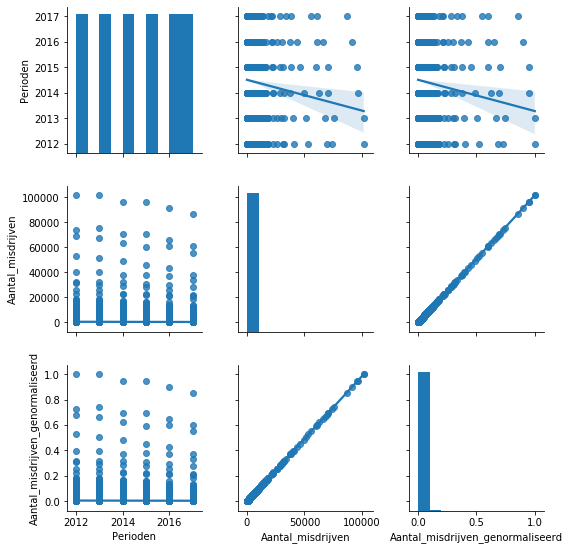

In [21]:
# Het maken van een pairplot.
sb.pairplot(misdrijven_df_lr, kind='reg')

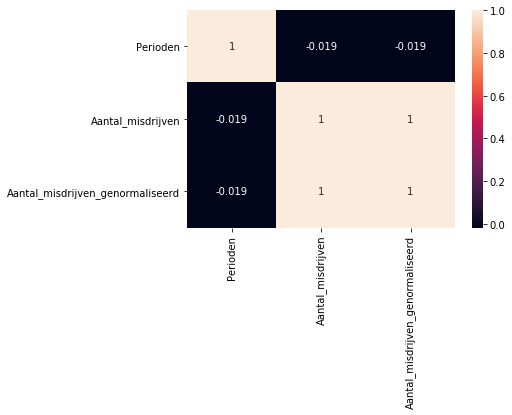

In [22]:
# Het maken van een heatmap.
data_corr = misdrijven_df_lr.corr()
sb.heatmap(data_corr, annot=True)

## Hypothese Lineaire Regressie

Als ik zo kijk naar de pairplot en heatmap die ik heb gemaakt. Kan ik een hypothese opstellen dat het gebruikmaken van een lineaire regressie geen toegevoegde waarde heeft. Er is alleen een correlatie tussen de "Aantal_misdrijven" en "Aantal_misdrijven_genormaliseerd", wat overigens logisch is aangezien "Aantal_misdrijven_genormaliseerd" is opgemaakt vanuit "Aantal_misdrijven". Dit betekend dat "Aantal_misdrijven" een 1 op 1 correlatie heeft met "Aantal_misdrijven_genormaliseerd". Hier kan dan vervolgens geen duidelijke coclusie uit opgemaakt worden. De hypothese is dus dat de lineaire regressie niet betrouwbaar zal zijn.

## Train_Test_Split

In [23]:
# Het maken van een x en y waarde voor de lineaire regressie
x_lr = misdrijven_df_lr[['Perioden']]
y_lr = misdrijven_df_lr[['Aantal_misdrijven', 'Aantal_misdrijven_genormaliseerd']]

x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_lr, y_lr, test_size=0.3, random_state=56)
print("x train: ", x_lr_train.shape, "y train: ", y_lr_train.shape)
print("x test: ", x_lr_test.shape, "y test: ", y_lr_test.shape)

x train:  (17350, 1) y train:  (17350, 2)
x test:  (7436, 1) y test:  (7436, 2)


In [72]:
lr = LinearRegression()

# Model trainen
model = lr.fit(x_lr_train, y_lr_train)

# Helling
coef = lr.coef_

# Snijpunt
intercept = lr.intercept_

# Voorspelde waarde
y_lr_predict = lr.predict(x_lr_test)

In [73]:
# Print de coef en de intercept.
print(coef)
print(intercept)

[[-3.22548680e+01]
 [-3.17313015e-04]]
[6.54588456e+04 6.43963065e-01]


In [74]:
# Print de scores
print("Mean absolute is", mean_absolute_error(y_lr_test, y_lr_predict))
print("Mean squared is", mean_squared_error(y_lr_test, y_lr_predict), "and np sqaured is", np.sqrt(mean_squared_error(y_lr_test, y_lr_predict)))
print("r2 score is",r2_score(y_lr_test, y_lr_predict))
lr.score(x_lr_test, y_lr_test)

Mean absolute is 343.4498166252128
Mean squared is 4004716.479593402 and np sqaured is 2001.1787725221857
r2 score is 0.00018056761976570357


C:\Users\Seyfullah\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.00018056761976159574

## Conclusie & Advies Lineaire Regressie
Uit de score van de lineaire regressie is te zien dat deze voorspellende methode niet betrouwbaar is. De score is veel te laag om hier betrouwbare voorspellende data uit te kunnen halen.

De uitkomst voor het voorspellende data, met gebruik van lineaire regressie, is niet betrouwbaar.

## Tijdreeksanalyse
Hieronder wordt er een tijdreeksanalyse toegepast op de `misdrijven_df` dataset.

Voor deze voorspellende onderdeel wordt `misdrijven_df` in een nieuwe dataframe gezet genaamd `misdrijven_df_ta`.

In [75]:
# Benodigde imports voor het maken van een tijdreeksanalyse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#Variabele waardes uit de data halen
misdrijven_df_ta = misdrijven_df[['Perioden', 'Aantal_misdrijven']]
misdrijven_df_ta = misdrijven_df_ta.set_index('Perioden')

misdrijven_df_ta

,Aantal_misdrijven
Perioden,
2012,940.0
2013,785.0
2014,680.0
2015,645.0
2016,620.0
...,...
2013,20.0
2014,15.0
2015,25.0


## ADFuller

In [76]:
# Statistieken berekenen met ADFuller
result = adfuller(misdrijven_df_ta.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.444586
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


## Hypothese
Deze test laat zien dat de originele data wel statistisch significant stabiel (stationair) is.
- We kunnen het tijdreeksmodel verder opstellen met de originele veiligheid data.

## ARIMA
### Autocorrelatie MA-parameter

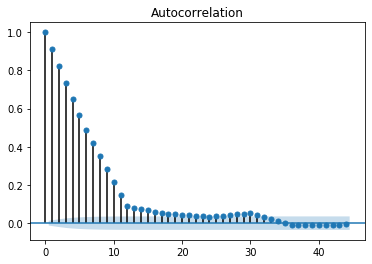

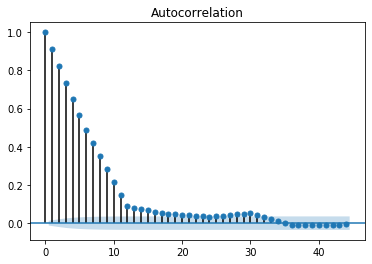

In [29]:
plot_acf(misdrijven_df_ta)

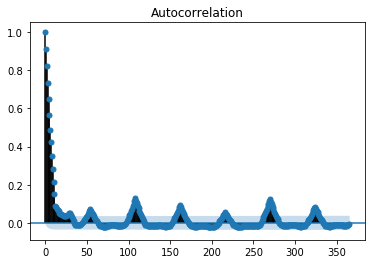

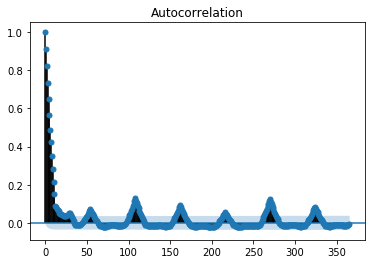

In [30]:
plot_acf(misdrijven_df_ta, lags=365)

### Autocorrelatie AR-parameter

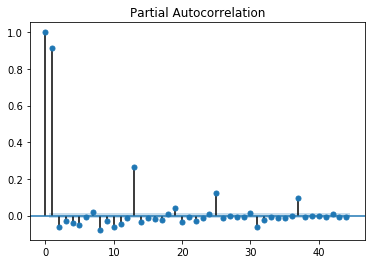

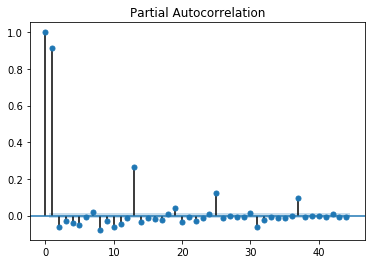

In [31]:
plot_pacf(misdrijven_df_ta)

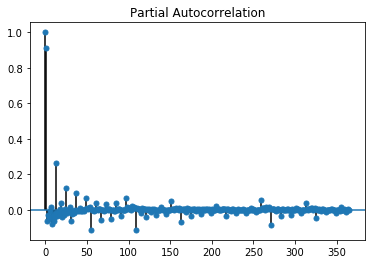

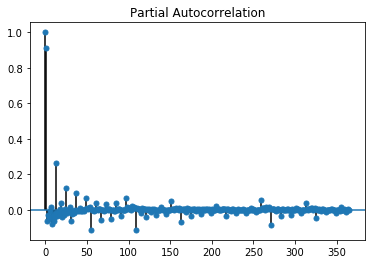

In [32]:
plot_pacf(misdrijven_df_ta, lags=365)

## ARIMA Model
### Hypothese AR-parameter & MA-parameter
Er moet 1 AR- en MA-parameter voor dit model ingevoerd te worden. Dit is te zien aan de bolletjes die niet geheel in de blauwe gedeelte van de autocorrelatie blijven zitten. Door de lag aan te passen naar een jaar (365 dagen) steken er minder waardes uit de blauwe zone.
- Hieruit kan ik dus concluderen dat het beter is als er 1  AR-parameter wordt ingevoerd.
- Hieruit kan ik dus concluderen dat het beter is als er 1  MA-parameter wordt ingevoerd.

C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.Aantal_misdrijven   No. Observations:                24785
Model:                  ARIMA(1, 1, 1)   Log Likelihood             -209264.525
Method:                        css-mle   S.D. of innovations           1123.553
Date:                 Thu, 21 May 2020   AIC                         418537.050
Time:                         13:04:27   BIC                         418569.522
Sample:                              1   HQIC                        418547.564
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0378      7.278     -0.005      0.996     -14.302      14.226
ar.L1.D.Aantal_misdrijven    -0.9223      0.005   -177.752      0.000      -0.

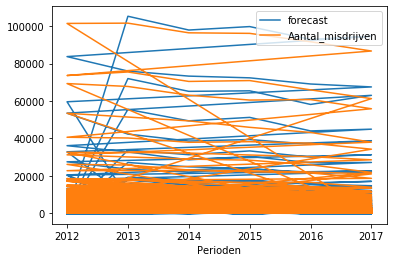

In [33]:
# ARIMA model.
misdrijven_df_ta_model = ARIMA(misdrijven_df_ta, order=(1, 1, 1)).fit()
print(misdrijven_df_ta_model.summary())
fig = misdrijven_df_ta_model.plot_predict(dynamic=False)

De p-waarde (P>|z|) gebruiken we om te bepalen of de losse componenten van het getrainde model (AR, I en MA) statistisch significant is. In dit model is de p-waarde >0.1, dit hadden we liever veel kleiner gezien (dus significanter). Dit voorspellende model is niet betrouwbaar.

Definitie: de BIC en AIC waarden zijn maten om te bepalen hoe goed een statistisch model van toepassing is. Het Akaike Information Criterium (AIC) is een criterium dat een compromis maakt tussen de kwaliteit van de fit en de complexiteit van het model. Hoe slechter de fit is, hoe hoger het AIC criterium.

Het model wordt beoordeeld door de AIC en BIC-waarden te vergelijken met ARIMA-modellen waar de AR en MA parameters anders zijn ingesteld.

## Tijdreeksmodel met de AR, I en MA waarden (2,1,1).

C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.Aantal_misdrijven   No. Observations:                24785
Model:                  ARIMA(2, 1, 1)   Log Likelihood             -208780.300
Method:                        css-mle   S.D. of innovations           1101.679
Date:                 Thu, 21 May 2020   AIC                         417570.601
Time:                         13:04:45   BIC                         417611.191
Sample:                              1   HQIC                        417583.744
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0142      0.011     -1.274      0.202      -0.036       0.008
ar.L1.D.Aantal_misdrijven     0.9711      0.006    153.205      0.000       0.

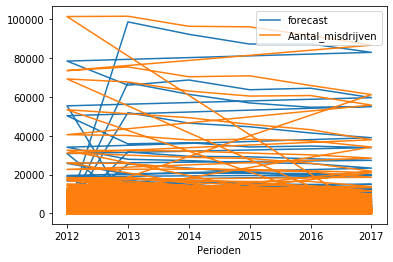

In [34]:
# ARIMA model.
misdrijven_df_ta_model = ARIMA(misdrijven_df_ta, order=(2, 1, 1)).fit()
print(misdrijven_df_ta_model.summary())
fig = misdrijven_df_ta_model.plot_predict(dynamic=False)

In dit model is de p-waarde nog steed >0.1. Het is wel veel lager vergeleken met het eerste ARIMA model.

De AIC en BIC waardes zijn een klein beetje gedaald. Dit betekend dat deze ARIMA model iets meer betrouwbaarder is dan het eerste model.

Het model wordt beoordeeld door de AIC en BIC-waarden te vergelijken met ARIMA-modellen waar de AR en MA parameters anders zijn ingesteld.

## Tijdreeksmodel met de AR, I en MA waarden (1,1,2).

C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Seyfullah\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Seyfullah\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Seyfullah\anaconda3\lib\site

                              ARIMA Model Results                              
Dep. Variable:     D.Aantal_misdrijven   No. Observations:                24785
Model:                  ARIMA(1, 1, 2)   Log Likelihood             -208783.253
Method:                        css-mle   S.D. of innovations           1101.808
Date:                 Thu, 21 May 2020   AIC                         417576.507
Time:                         13:05:03   BIC                         417617.097
Sample:                              1   HQIC                        417589.650
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0149      0.011     -1.355      0.175      -0.037       0.007
ar.L1.D.Aantal_misdrijven     0.9014      0.003    344.657      0.000       0.

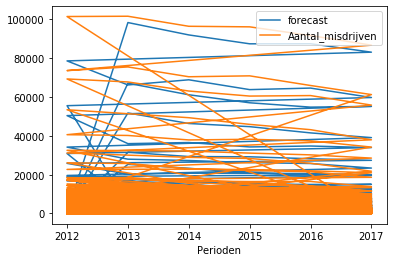

In [35]:
# ARIMA model.
misdrijven_df_ta_model = ARIMA(misdrijven_df_ta, order=(1, 1, 2)).fit()
print(misdrijven_df_ta_model.summary())
fig = misdrijven_df_ta_model.plot_predict(dynamic=False)

In dit model is de p-waarde nog steed >0.1. Het is wel weer lager vergeleken met het eerste tweedeb ARIMA model (2,1,1).

De AIC en BIC waardes zijn een klein beetje hoger dan de tweede model. Dit betekend dat deze ARIMA model ongeveer hetzelfde is als het vorig model (2,1,1).

Het model wordt beoordeeld door de AIC en BIC-waarden te vergelijken met ARIMA-modellen waar de AR en MA parameters anders zijn ingesteld.

In [79]:
print("Voorspelde waarde: ", ARIMA(misdrijven_df_ta, order=(2,1,1)).fit().predict())
print("Echte waarden: ", misdrijven_df_ta["Aantal_misdrijven"])

C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Seyfullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Voorspelde waarde:  Perioden
2013    -0.014172
2014    -2.767125
2015     5.393922
2016    11.335938
2017    12.735339
          ...    
2013    28.205368
2014    27.736206
2015    27.555427
2016    27.586290
2017    27.083435
Length: 24785, dtype: float64
Echte waarden:  Perioden
2012    940.0
2013    785.0
2014    680.0
2015    645.0
2016    620.0
        ...  
2013     20.0
2014     15.0
2015     25.0
2016     20.0
2017     30.0
Name: Aantal_misdrijven, Length: 24786, dtype: float64


## Conclusie Tijdreeksanalyse
In de hypothese werd gesteld dat de tijdreeksanalyse een betrouwbare voorspelling kan geven van het aantal misdrijven. Uit de resultaten blijkt dat deze voorspelling niet genoeg is. Dit is af te lezen aan de P>|z| waarde, deze is namelijk erg hoog. Ideaal was het als deze dichtbij de 0 lag of <0.1.

Als de voorspelde waardes worden vergeleken met de echte waardes, dan valt op dat het model er toch nog vaak erg veel naast zit. Dit gaat in tegen de hypothese. Het blijkt dus dat het model er toch niet in slaagt om een accurate voorspelling te geven.

## Advies Tijdreeksanalyse
Het advies is dan ook om dit model met deze dataset niet te gaan gebruiken voor voorspellende doeleinden. De methode en de stationairheid van de data is goed, dus deze eigenschappen kunnen wel gebruikt worden. Het is beter dat er een dataset gebruikt zal worden, die specifiekere tijdsindelingen bevat zoals de aantal misdrijven per maand. Dit komt omdat de dataset dan meer tijdseenheden heeft om op getraind te worden.